# Fake Job Posting Prediction




**About the Data:** 

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

**Acknowledgements:** The University of the Aegean | Laboratory of Information & Communication Systems Security http://emscad.samos.aegean.gr/

**Inspiration:**

The dataset is very valuable as it can be used to answer the following questions:

1) Create a classification model that uses text data features and meta-features and predict which job description are fraudulent or real.

2) Identify key traits/features (words, entities, phrases) of job descriptions which are fraudulent in nature.

3) Run a contextual embedding model to identify the most similar job descriptions.

4) Perform Exploratory Data Analysis on the dataset to identify interesting insights from this dataset.

# Importing Data

**Source:** https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('fake_job_postings.csv')

## Exploratory Data Analysis and Data Visualization

## [1] Basic Preprocessing

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df1 = df.copy()

In [6]:
df1.drop(['job_id'], axis = 1, inplace = True)

In [7]:
df1.nunique() #unique values for each attribute

title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [8]:
df1[df1.duplicated()]       

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
146,Customer Service Associate,"US, TX, Dallas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,QualificationsMinimum of 6 months customer ser...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,0
402,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
495,Customer Service Associate - Part Time,"US, IL, Warrenville",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Insurance,Administrative,0
1019,Texas Captioning Assistant,"US, TX, Lubbock",CSD Relay,NaN,"Why CSD?CSD is not only a great place to work,...",Captioning Assistants provide quick and accura...,A minimum of a High School Diploma or equivale...,CSD offers a competitive benefits package for ...,0,1,1,NaN,Entry level,High School or equivalent,Telecommunications,Customer Service,0
1327,Recruiter/Recruiting Assistant,"US, CA, Inglewood",NaN,NaN,NaN,“We believe our best investment is in our peop...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17591,Home Based Payroll Typist/Data Entry Clerks Po...,"US, MT, Absarokee",Clerical,NaN,NaN,We have several openings available in this are...,"Basic computer and typing skills, ability to s...",All you need is access to the Internet and you...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17612,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",NaN,NaN,NaN,Urgent Jobs (Part Time Workers Needed)You can ...,No any experience required.,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17620,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",NaN,NaN,NaN,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17742,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",NaN,NaN,NaN,ACCEPTING ONLINE APPLICATIONS ONLYClick Here T...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [9]:
df1 = df1.drop_duplicates(keep = 'first')

In [10]:
df1.shape

(17599, 17)

In [11]:
df1.isna().sum() #null values for each attribute

title                      0
location                 341
department             11328
salary_range           14772
company_profile         3282
description                1
requirements            2648
benefits                7106
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3428
required_experience     6962
required_education      8009
industry                4837
function                6363
fraudulent                 0
dtype: int64

In [12]:
df1['salary_range'].unique() #84% of data is null and of those 16% data some have noise

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [13]:
df1.drop(['salary_range'], axis = 1, inplace = True)

In [14]:
df1['department'].unique()[:1000]

array(['Marketing', 'Success', nan, 'Sales', 'ANDROIDPIT', 'HR', ' R&D',
       'Engagement', 'Businessfriend.com', 'Medical', 'Field', 'All',
       'Design', 'Production', 'ICM', 'General Services', 'Engineering',
       'IT', 'Business Development', 'Human Resources', 'Oil & Energy',
       'Marketplace', 'Cloud Services', 'FP', 'Client Services',
       'Operations', 'Materials', 'tech',
       'Sales and Business Development', 'R&D', 'Development',
       'Incubation Services', 'Field Operations', 'MKT', 'Technology',
       'Power Plant & Energy', 'Approvals Department', 'Playfair Capital',
       'Development ', 'Tech', 'Software development', 'Media', 'Line-Up',
       'Management', 'Squiz ', 'Finance', 'Financial', 'Retail',
       'Marketing and Communications', 'Research', 'Connectivity', 'PMO',
       'Product', 'Student Beans Mag', 'Information Technology Group',
       'DTVMA', 'G&A', 'Implementations', 'OPS', 'Partnership Management',
       'Professional Services', 'Cus

In [15]:
df1.drop(['department'], axis = 1, inplace = True)

## [2] Data Visualization 

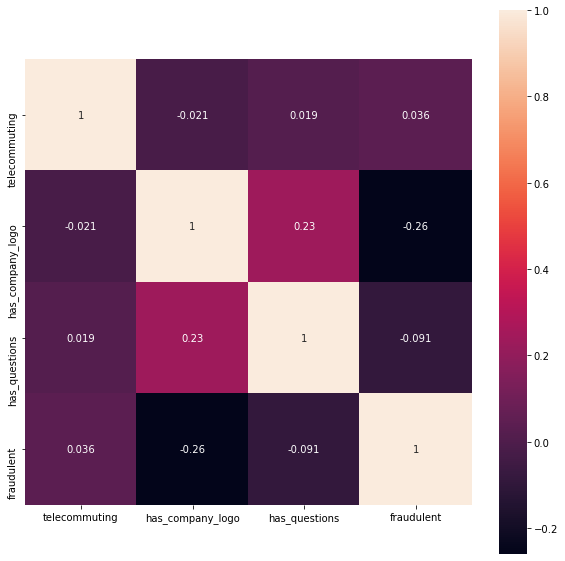

In [16]:
plt.figure(figsize = (10,10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square = True, annot=True)

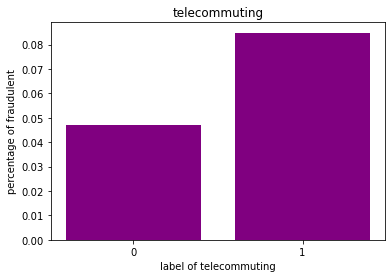

In [17]:
#Visualizing Binary Variables 
#telecommuting
viz = df1.groupby('telecommuting').mean()['fraudulent']#viz is an object
plt.title('telecommuting')
plt.xlabel('label of telecommuting')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(viz.index,dtype='str'),viz,color='purple')
plt.show()

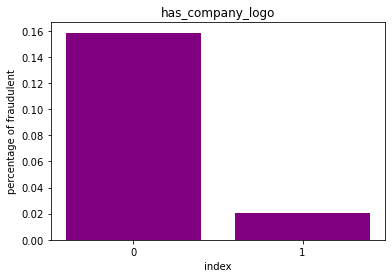

In [18]:
#has_company _logo
viz=df1.groupby('has_company_logo').mean()['fraudulent']
plt.title('has_company_logo')
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(viz.index,dtype='str'),viz, color = 'purple')
plt.show()

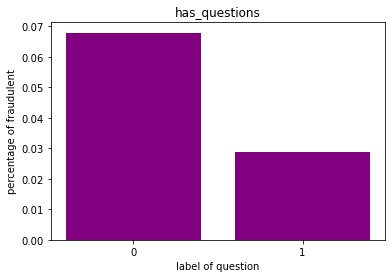

In [19]:
#has questions
viz=df1.groupby('has_questions').mean()['fraudulent']
plt.title('has_questions')
plt.xlabel('label of question')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(viz.index,dtype='str'),viz, color='purple')
plt.show()

In [20]:
df1.isnull().sum()

title                     0
location                341
company_profile        3282
description               1
requirements           2648
benefits               7106
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3428
required_experience    6962
required_education     8009
industry               4837
function               6363
fraudulent                0
dtype: int64

In [21]:
df1['employment_type'] = df1['employment_type'].bfill(axis=0)
df1['required_experience'] = df1['required_experience'].bfill(axis=0)
df1['required_education'] = df1['required_education'].bfill(axis = 0)
df1['industry'] = df1['industry'].bfill(axis=0)
df1['function'] = df1['function'].bfill(axis=0)

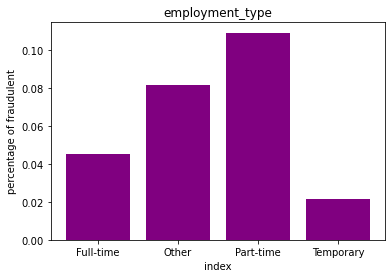

In [22]:
#Visualizing text variables

#employment_type
viz=df1.groupby('employment_type').mean()['fraudulent'][1:]
plt.title('employment_type')
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.bar(np.array(viz.index,dtype='str'),viz,color='purple')
plt.show()

index 1: Bachelor's Degree, index 2: Certification, index 3: Doctorate, index 4: High School or equivalent, index 5: Master's Degree, index 6: Professional, index 7: Some College Coursework Completed, index 8: Some High School Coursework, index 9: Unspecified, index 10: Vocational, index 11: Vocational - Degree, index 12: Vocational - HS Diploma, 

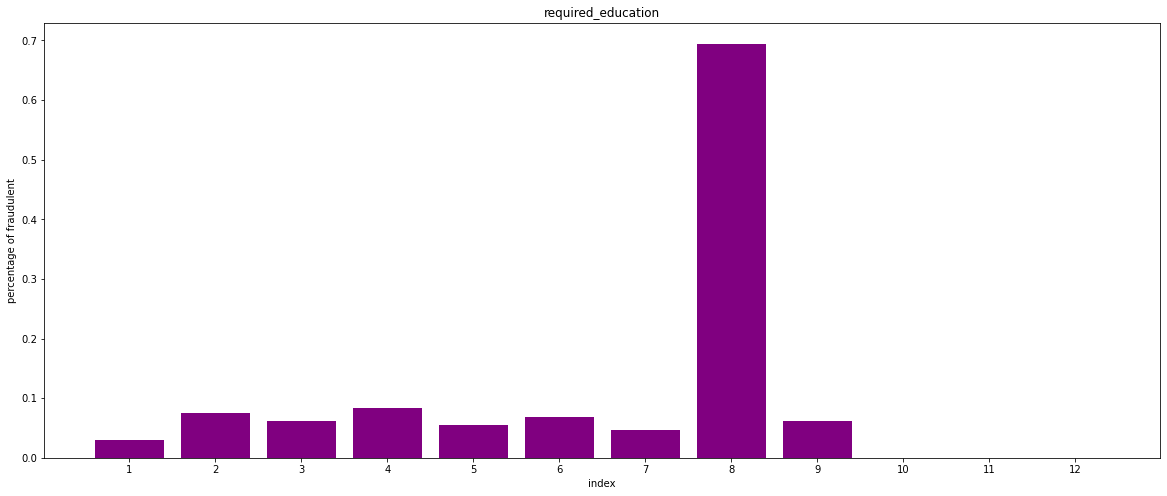

In [23]:
#required education: There are 13 categories of required education
viz=df1.groupby('required_education').mean()['fraudulent'][1:]
for k,i in enumerate(np.array(viz.index,dtype='str')):
    print(f'index {k+1}: {i}',end=", ")
plt.figure(figsize=(20,8))
plt.title('required_education')
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.xticks(np.arange(1,len(viz)+1,1))
plt.bar(np.arange(1,len(viz)+1,1),viz,color='purple')
plt.show()

index 1: Director, index 2: Entry level, index 3: Executive, index 4: Internship, index 5: Mid-Senior level, index 6: Not Applicable, 

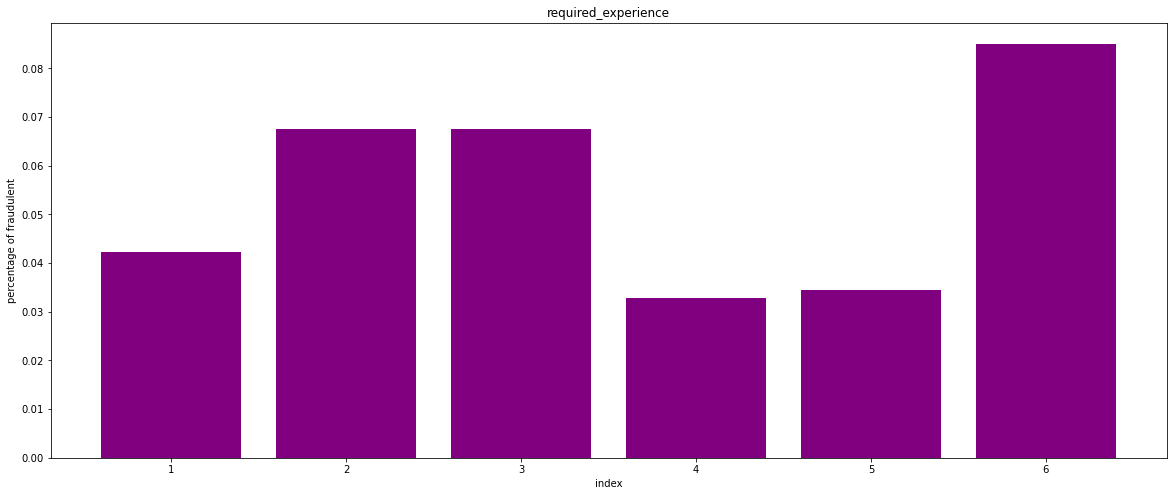

In [24]:
#required experience
viz=df1.groupby('required_experience').mean()['fraudulent'][1:]
for k,i in enumerate(np.array(viz.index,dtype='str')):
    print(f'index {k+1}: {i}',end=", ")
plt.figure(figsize=(20,8))
plt.title('required_experience')
plt.xlabel('index')
plt.ylabel('percentage of fraudulent')
plt.xticks(np.arange(1,len(viz)+1,1))
plt.bar(np.arange(1,len(viz)+1,1),viz,color='purple')
plt.show()

## [3] Text Preprocessing and Visualization

In [25]:
df1.isna().sum()

title                     0
location                341
company_profile        3282
description               1
requirements           2648
benefits               7106
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        1
industry                  0
function                  0
fraudulent                0
dtype: int64

In [26]:
df1 = df1[df1['description'].notna()]

In [27]:
df1.fillna("",axis=0,inplace=True)

In [28]:
df1['description'] = df1['description'] + ' ' + df1['requirements'] + ' ' + df1['company_profile']
df1.drop(['company_profile', 'requirements','benefits'], axis = 1, inplace = True)

In [29]:
df1.head(3)

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,Bachelor's Degree,Marketing and Advertising,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


In [30]:
df1['country_code'] = df1['location'].str.split(',', expand=True)[0]
#df1['city'] = df1['location'].str.split(',', expand = True)[2]

In [32]:
df1.isnull().sum()

title                  0
location               0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country_code           0
dtype: int64

In [33]:
import pycountry
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
def country(df):
    if df['country_code'] in list_alpha_2:
        return pycountry.countries.get(alpha_2 = df['country_code']).name
df1['country_name'] = df1.apply(country, axis = 1)

In [34]:
df1.drop(['location', 'country_code'], axis = 1, inplace = True)

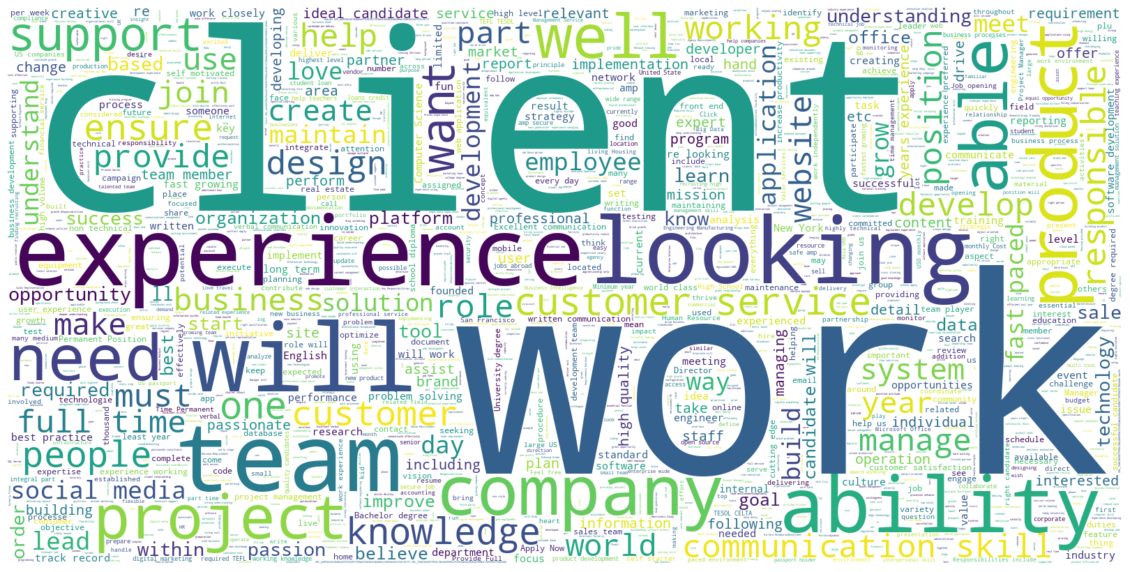

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Word cloud for real jobs
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df1[df1.fraudulent == 0]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')

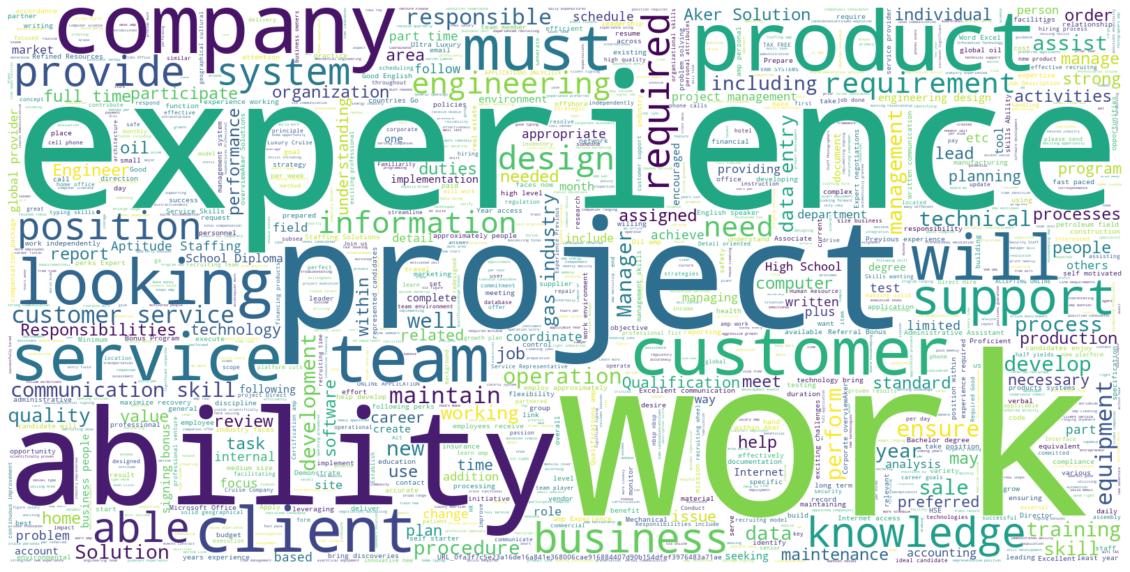

In [36]:
#Word cloud for fake jobs
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df1[df1.fraudulent == 1]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')

In [37]:
import string 
punctuations = string.punctuation

In [38]:
import spacy 
spacy.load('en_core_web_md')
nlp = spacy.load('en_core_web_lg')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def cleanup_text(docs, logging = False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 100 == 0 and logging:
            print ("Processed %d out of %d documents."%(counter, len(docs)))
        counter +=1
        doc = nlp(doc, disable = ['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [39]:
Fraud_1 = [text for text in df1[df1['fraudulent'] == 1]['description']]

In [40]:
Fraud_0 = [text for text in df1[df1['fraudulent'] == 0]['description']]

In [41]:
Fraud_1_clean = cleanup_text(Fraud_1)
Fraud_1_clean = ' '.join(Fraud_1_clean).split()

In [42]:
Fraud_0_clean = cleanup_text(Fraud_0)
Fraud_0_clean = ' '.join(Fraud_0_clean).split()

In [43]:
from collections import Counter
Fraud_1_counts = Counter(Fraud_1_clean)
Fraud_0_counts = Counter(Fraud_0_clean)

In [44]:
Fraud_1_common_words = [word[0] for word in Fraud_1_counts.most_common(20)]
Fraud_1_common_counts = [word[1] for word in Fraud_1_counts.most_common(20)]

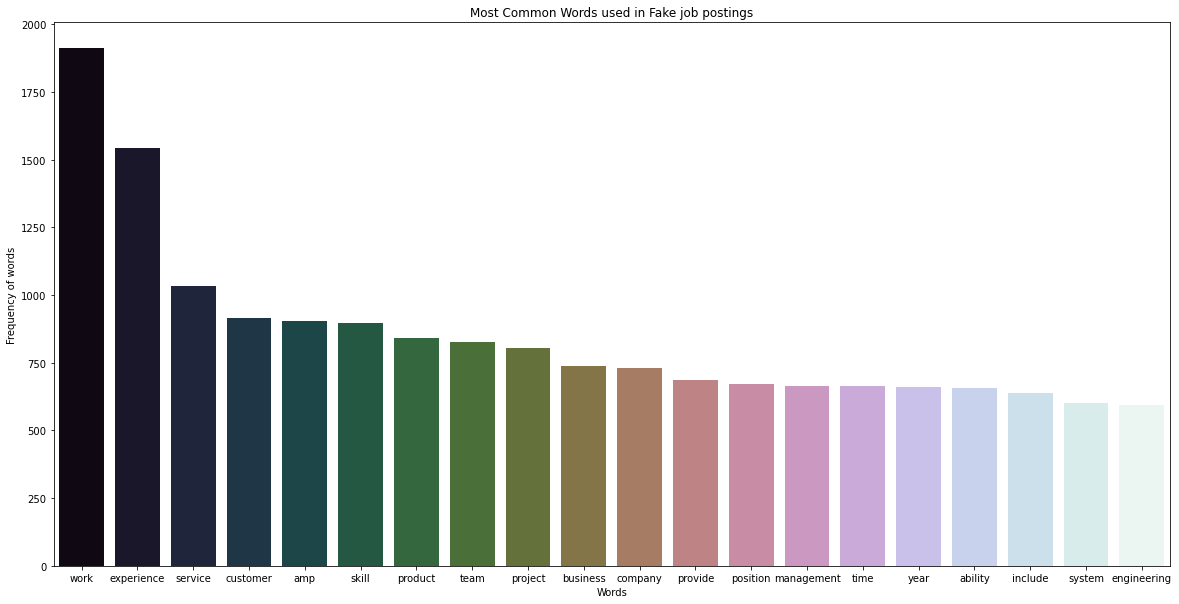

In [45]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_1_common_words, y = Fraud_1_common_counts, palette=pal)
plt.title('Most Common Words used in Fake job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [46]:
Fraud_0_common_words = [word[0] for word in Fraud_0_counts.most_common(20)]
Fraud_0_common_counts = [word[1] for word in Fraud_0_counts.most_common(20)]

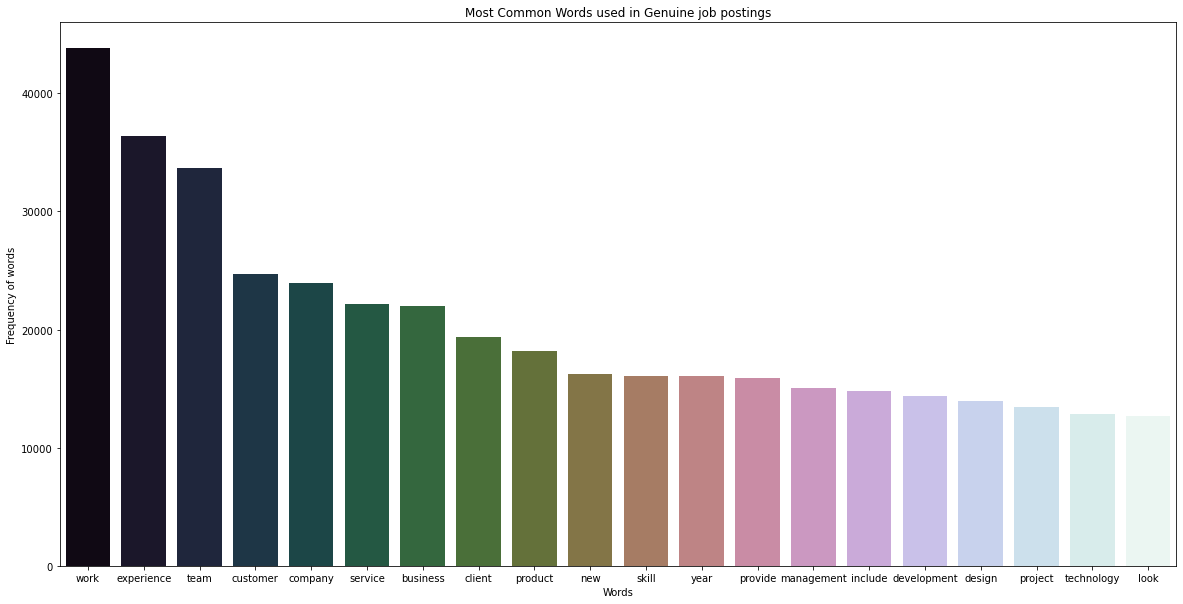

In [47]:
fig = plt.figure(figsize = (20, 10))
pal = sns.color_palette("cubehelix", 20)
sns.barplot(x = Fraud_0_common_words, y = Fraud_0_common_counts, palette=pal)
plt.title('Most Common Words used in Genuine job postings')
plt.ylabel("Frequency of words")
plt.xlabel("Words")
plt.show()

In [52]:
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
STOPLIST = set(stopwords.words('english')+list(ENGLISH_STOP_WORDS))
SYMBOLS = " ".join(string.punctuation).split(" ")
from spacy.lang.en import English
parser = English()
from nltk.stem import WordNetLemmatizer

In [53]:
def tokenizetext(sample):
    text = sample.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    tokens = parser(text)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = tokenizetext, ngram_range = (1,3), min_df = 0.06)

In [56]:
vectorizer_features = vectorizer.fit_transform(df1['description'])

In [57]:
vectorizer_features.shape

(17598, 545)

In [58]:
vectorizer_features

<17598x545 sparse matrix of type '<class 'numpy.int64'>'
	with 1278840 stored elements in Compressed Sparse Row format>

In [59]:
vectorized_df = pd.DataFrame(vectorizer_features.todense(), columns = vectorizer.get_feature_names())
df_vectorized = pd.concat([df1, vectorized_df], axis = 1)

In [60]:
df_vectorized.drop('description', axis = 1, inplace = True)
df_vectorized.dropna(inplace=True)

In [61]:
df_vectorized.head()

,title,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,...,written communication,year,years,years experience,york,–,’,’s,“,”
0,Marketing Intern,0.0,1.0,0.0,Other,Internship,Bachelor's Degree,Marketing and Advertising,Marketing,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,Customer Service - Cloud Video Production,0.0,1.0,0.0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Commissioning Machinery Assistant (CMA),0.0,1.0,0.0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0
3,Account Executive - Washington DC,0.0,1.0,0.0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0
4,Bill Review Manager,0.0,1.0,1.0,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0


In [62]:
columns_to_1_hot = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_vectorized[column])
    df_vectorized = pd.concat([df_vectorized, encoded], axis = 1)

In [63]:
columns_to_1_hot += ['title', 'city', 'country_name']
df_vectorized.drop(columns_to_1_hot, axis = 1, inplace = True)

In [65]:
from sklearn.model_selection import train_test_split

target = df_vectorized['fraudulent']
features = df_vectorized.drop('fraudulent', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, stratify = target, random_state=42)

## Modelling

## 1. Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1', 'l2']
param_grid = dict(C = c_values, penalty = penalty_options)

In [113]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose=1)

In [114]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.0min finished
/home/akash/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [115]:
grid.best_score_

0.7840954915666619

In [116]:
grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [117]:
log_reg_pred = grid.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [119]:
roc_auc_score(y_test, log_reg_pred)

0.5731149542624951

In [120]:
print (classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1638
         1.0       0.26      0.16      0.20        61

    accuracy                           0.95      1699
   macro avg       0.61      0.57      0.59      1699
weighted avg       0.94      0.95      0.95      1699



In [77]:
Model_Score = []
Model_Name = []
Model_Name.append('Logistic_Regression')
Model_Score.append(round(roc_auc_score(y_test, log_reg_pred), 4))

## 2. KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(np.arange(2, 23, 2))
param_grid_knn = dict(n_neighbors = k_range)
print (param_grid_knn)

{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}


In [79]:
grid_knn = GridSearchCV(knn, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [80]:
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed: 18.4min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                         22]},
             scoring='roc_auc', verbose=1)

In [81]:
grid_knn.best_score_

0.5394016840118377

In [82]:
grid_knn.best_params_

{'n_neighbors': 22}

In [83]:
knn_pred = grid_knn.predict(X_test)

In [84]:
print (roc_auc_score(y_test, knn_pred))
print (classification_report(y_test, knn_pred))

0.5
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1638
         1.0       0.00      0.00      0.00        61

    accuracy                           0.96      1699
   macro avg       0.48      0.50      0.49      1699
weighted avg       0.93      0.96      0.95      1699



/home/akash/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
Model_Name.append('KNN')
Model_Score.append(round(roc_auc_score(y_test, knn_pred), 4))

## 3. SVC

In [87]:
from sklearn.svm import SVC
svc = SVC()
kernel = ['linear', 'rbf']
param_grid_knn = dict(kernel = kernel)
print (param_grid_knn)

{'kernel': ['linear', 'rbf']}


In [88]:
grid_svc = GridSearchCV(svc, param_grid_knn, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

In [89]:
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.0min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf']}, scoring='roc_auc',
             verbose=2)

In [90]:
grid_svc.best_score_

0.7809940844365854

In [91]:
grid_svc.best_params_

{'kernel': 'linear'}

In [92]:
svc_pred = grid_svc.predict(X_test)

In [93]:
print (roc_auc_score(y_test, svc_pred))
print (classification_report(y_test, svc_pred))

0.5218429111871735
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1638
         1.0       0.25      0.05      0.08        61

    accuracy                           0.96      1699
   macro avg       0.61      0.52      0.53      1699
weighted avg       0.94      0.96      0.95      1699



In [94]:
Model_Name.append('SVC')
Model_Score.append(round(roc_auc_score(y_test, svc_pred), 4))

## 4. Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
n_estimators_range = [1, 2, 4, 8, 16, 32, 64, 100, 200]
param_grid_rf = dict(n_estimators = n_estimators_range)
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 10, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [96]:
grid_rf.fit(X_train, y_train)
print (grid_rf.best_score_)
print (grid_rf.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


0.8289288537546806
{'n_estimators': 200}


In [97]:
rf_pred = grid_rf.predict(X_test)
print (roc_auc_score(y_test, rf_pred))
print (classification_report(y_test, rf_pred))

0.5078914710062251
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1638
         1.0       0.50      0.02      0.03        61

    accuracy                           0.96      1699
   macro avg       0.73      0.51      0.51      1699
weighted avg       0.95      0.96      0.95      1699



In [98]:
Model_Name.append('Random_Forest')
Model_Score.append(round(roc_auc_score(y_test, rf_pred), 4))

## 5. Sklearn's MLP Classifier (solver = 'sgd')

In [99]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver = 'sgd', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)

In [100]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000, solver='sgd')

In [101]:
mlp_pred = mlp.predict(X_test)
print (roc_auc_score(y_test, mlp_pred))
print (classification_report(y_test, mlp_pred))

0.5321313477051182
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1638
         1.0       0.15      0.08      0.11        61

    accuracy                           0.95      1699
   macro avg       0.56      0.53      0.54      1699
weighted avg       0.94      0.95      0.94      1699



In [102]:
Model_Name.append('MLP-NN (sgd)')
Model_Score.append(round(roc_auc_score(y_test, mlp_pred), 4))

## 6. Sklearn's MLP Classifier (solver = 'adam')

In [103]:
mlp = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)

In [104]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

In [105]:
mlp_pred = mlp.predict(X_test)
print (roc_auc_score(y_test, mlp_pred))
print (classification_report(y_test, mlp_pred))

0.5655287335615203
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1638
         1.0       0.25      0.15      0.19        61

    accuracy                           0.95      1699
   macro avg       0.61      0.57      0.58      1699
weighted avg       0.94      0.95      0.95      1699



In [106]:
Model_Name.append('MLP-NN (adam)')
Model_Score.append(round(roc_auc_score(y_test, mlp_pred), 4))

## Model Comparison

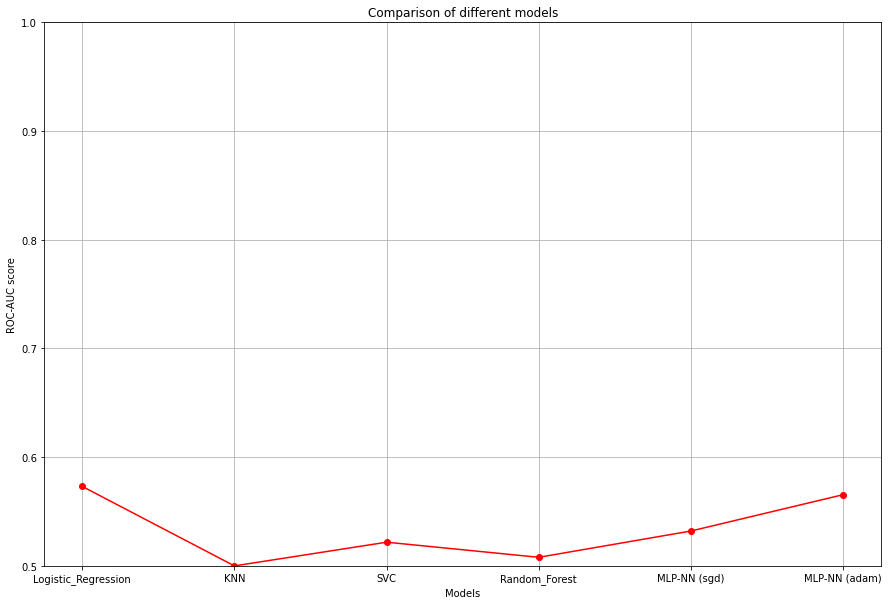

In [107]:
plt.figure(figsize = (15, 10))
plt.plot(Model_Name,Model_Score, marker = 'o', color = 'red')
plt.title('Comparison of different models')
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.ylim(0.5, 1.0)
plt.grid()
plt.savefig('Model_compare.jpeg')
plt.show()